In [1]:
import os
import pandas as pd
import tensorflow as tf
import subprocess
import pickle
import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from train import train_lnphi


In [2]:

# Load and prepare training data
LNPHI_PATH = r"E:\Datasets"
datafile_name = r"nC4_data_nC4-nC10_T300-650_P5-100_x0-1_20200915-111553.csv"
# nC10_data_nC4-nC10_PTx_range_20200822-113453.csv
log_save_dir = r"C:\Users\win7\Desktop\logs"

tr = train_lnphi()
tr.load_lnphi_data(LNPHI_PATH, datafile_name)
#tr.lnphi_range(-10, 10)
tr.split_data()
tr.feature_eng()

Loading done. Shape: (30944164, 5)
Splitting done.
Feature Eng done.


In [ ]:
list(tr.X_train)

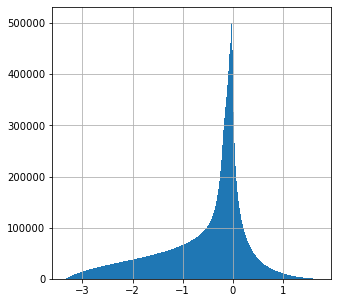

In [14]:
tr.lnphi['lnphi'].hist(bins=500, figsize=(5,5))
plt.show()

In [3]:
tr.lnphi['lnphi'].describe()

count    3.094416e+07
mean    -5.674223e-01
std      8.671698e-01
min     -3.345515e+00
25%     -1.019506e+00
50%     -2.418318e-01
75%     -2.024817e-02
max      1.713882e+00
Name: lnphi, dtype: float64

In [ ]:
# Note: Histogram may have empty bins. This is an effect of bin resolution, and does not necessarily mean
# the distribution has a gap.
import matplotlib.pyplot as plt
d = pd.DataFrame(tr.X_train, columns=list(tr.X_train))
d.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
d.describe()

In [ ]:
import matplotlib.pyplot as plt
d2 = pd.DataFrame(tr.X_train_prepared, columns=list(tr.X_train))
d2.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
'''d2.describe()'''

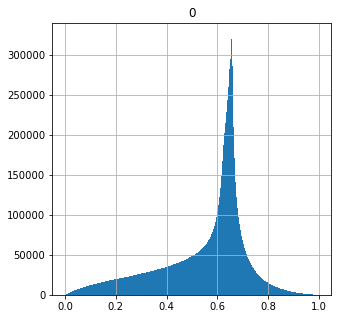

In [15]:

d3 = pd.DataFrame(tr.y_train_prepared)
d3.hist(bins=500, figsize=(5,5))
plt.show()

In [ ]:
d3.describe()

In [ ]:
'''# Load model
tr.model = tf.keras.models.load_model(
    r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642\norm_all_4096_3_40_250_20200810-195701')
# Give existing log directory
tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642'
tr.model.summary()'''


In [4]:
# Train
name_prefix = 'lnphi_nC4_T300-600_P5-100_'
batch_size = 100
n_layers = 4
n_nodes = 20
epochs = 100
initial_epoch = 0 # 0 if new model

tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

New logdir created.
Train on 19804264 samples, validate on 4951067 samples
Epoch 1/100

Epoch 00001: mse improved from inf to 0.00007, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 308s - loss: 7.3926e-05 - mse: 7.3927e-05 - mae: 0.0026 - mean_absolute_percentage_error: 1.0515 - val_loss: 3.6668e-06 - val_mse: 3.6668e-06 - val_mae: 0.0013 - val_mean_absolute_percentage_error: 0.3361
Epoch 2/100

Epoch 00002: mse improved from 0.00007 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-11222

Epoch 16/100

Epoch 00016: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 300s - loss: 1.1105e-06 - mse: 1.1105e-06 - mae: 6.1926e-04 - mean_absolute_percentage_error: 0.3618 - val_loss: 1.8525e-06 - val_mse: 1.8525e-06 - val_mae: 0.0011 - val_mean_absolute_percentage_error: 0.2826
Epoch 17/100

Epoch 00017: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 282s - loss: 1.0846e-06 - mse: 1.0846e-06 - mae: 6.0977e-04 - mean_absolute_percentage_error: 0.2118 - val_loss: 3.47

INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 285s - loss: 7.6945e-07 - mse: 7.6945e-07 - mae: 5.2725e-04 - mean_absolute_percentage_error: 0.2342 - val_loss: 9.3969e-07 - val_mse: 9.3970e-07 - val_mae: 8.1435e-04 - val_mean_absolute_percentage_error: 0.2123
Epoch 33/100

Epoch 00033: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 300s - loss: 7.5302e-07 - mse: 7.5302e-07 - mae: 5.2254e-04 - mean_absolute_percentage_error: 0.4008 - val_loss: 3.0557e-07 - val_mse: 3.0557e-07 - val_mae: 4.0624e-04 - val_mean_absolute_percentage_error: 0.1467
Epoch 34/100

Epoch 00034: mse improved from 0.00000 to 0.00000, saving model 

19804264/19804264 - 297s - loss: 5.8992e-07 - mse: 5.8992e-07 - mae: 4.6286e-04 - mean_absolute_percentage_error: 0.1643 - val_loss: 4.8905e-07 - val_mse: 4.8905e-07 - val_mae: 4.2817e-04 - val_mean_absolute_percentage_error: 0.2712
Epoch 50/100

Epoch 00050: mse did not improve from 0.00000
19804264/19804264 - 297s - loss: 6.0427e-07 - mse: 6.0427e-07 - mae: 4.6647e-04 - mean_absolute_percentage_error: 0.1653 - val_loss: 1.9229e-07 - val_mse: 1.9229e-07 - val_mae: 3.2294e-04 - val_mean_absolute_percentage_error: 0.0988
Epoch 51/100

Epoch 00051: mse did not improve from 0.00000
19804264/19804264 - 294s - loss: 6.2457e-07 - mse: 6.2456e-07 - mae: 4.6610e-04 - mean_absolute_percentage_error: 0.4622 - val_loss: 3.6501e-07 - val_mse: 3.6502e-07 - val_mae: 4.6166e-04 - val_mean_absolute_percentage_error: 0.1287
Epoch 52/100

Epoch 00052: mse did not improve from 0.00000
19804264/19804264 - 348s - loss: 6.0244e-07 - mse: 6.0243e-07 - mae: 4.6254e-04 - mean_absolute_percentage_error: 0.2726 

Epoch 69/100

Epoch 00069: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 353s - loss: 5.2366e-07 - mse: 5.2366e-07 - mae: 4.3809e-04 - mean_absolute_percentage_error: 0.2054 - val_loss: 2.0435e-07 - val_mse: 2.0435e-07 - val_mae: 3.0419e-04 - val_mean_absolute_percentage_error: 0.0815
Epoch 70/100

Epoch 00070: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 352s - loss: 5.1552e-07 - mse: 5.1551e-07 - mae: 4.3491e-04 - mean_absolute_percentage_error: 0.1770 - val_loss: 

INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 318s - loss: 4.6227e-07 - mse: 4.6227e-07 - mae: 4.2315e-04 - mean_absolute_percentage_error: 0.2328 - val_loss: 5.8912e-07 - val_mse: 5.8911e-07 - val_mae: 6.6729e-04 - val_mean_absolute_percentage_error: 0.1690
Epoch 89/100

Epoch 00089: mse did not improve from 0.00000
19804264/19804264 - 315s - loss: 4.7242e-07 - mse: 4.7241e-07 - mae: 4.2411e-04 - mean_absolute_percentage_error: 0.1471 - val_loss: 1.9279e-07 - val_mse: 1.9279e-07 - val_mae: 3.0759e-04 - val_mean_absolute_percentage_error: 0.0989
Epoch 90/100

Epoch 00090: mse did not improve from 0.00000
19804264/19804264 - 322s - loss: 4.7047e-07 - mse: 4.7046e-07 - mae: 4.2128e-04 - mean_absolute_percentage_error: 0.1584 - val_loss: 2.3388e-07 - val_mse: 2.3388e-07 - val_mae: 3.2046e-04 - val_mean_absolute_percentage_error: 0.1142
Epoch 91/100

Epoch 00091: mse did not imp

In [5]:
tr.logdir

'C:\\Users\\win7\\Desktop\\logs.\\logs\\scalars\\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226'

In [6]:
# Train
name_prefix = 'lnphi_nC4_T300-600_P5-100_'
batch_size = 256
n_layers = 4
n_nodes = 20
epochs = 200
initial_epoch = 99 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 19804264 samples, validate on 4951067 samples
Epoch 100/200

Epoch 00100: mse improved from inf to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 131s - loss: 2.3933e-07 - mse: 2.3933e-07 - mae: 3.1798e-04 - mean_absolute_percentage_error: 0.1060 - val_loss: 3.4479e-07 - val_mse: 3.4479e-07 - val_mae: 4.6934e-04 - val_mean_absolute_percentage_error: 0.1558
Epoch 101/200

Epoch 00101: mse did not improve from 0.00000
19804264/19804264 - 129s - loss: 2.4529e-07 - mse: 2.4529e-07 - mae: 3.1624e-04 - mean_absolute_percentage_error: 0.1350 - val_loss: 1.6377e-07 - val_mse: 1.6377e-07 - val_mae: 2.7718e-04 - val_mean_absolute_percentage_error: 0.0748
Epoch 102/200

Epoch 00102: mse did not improve from 0.00000
19804264/19804264 - 129s - loss: 2.4317e-07

Epoch 125/200

Epoch 00125: mse did not improve from 0.00000
19804264/19804264 - 143s - loss: 2.2828e-07 - mse: 2.2828e-07 - mae: 3.0789e-04 - mean_absolute_percentage_error: 0.1901 - val_loss: 1.1175e-07 - val_mse: 1.1175e-07 - val_mae: 2.3901e-04 - val_mean_absolute_percentage_error: 0.0797
Epoch 126/200

Epoch 00126: mse did not improve from 0.00000
19804264/19804264 - 157s - loss: 2.3014e-07 - mse: 2.3013e-07 - mae: 3.0743e-04 - mean_absolute_percentage_error: 0.1902 - val_loss: 1.7119e-07 - val_mse: 1.7119e-07 - val_mae: 3.0387e-04 - val_mean_absolute_percentage_error: 0.1133
Epoch 127/200

Epoch 00127: mse did not improve from 0.00000
19804264/19804264 - 157s - loss: 2.3139e-07 - mse: 2.3139e-07 - mae: 3.0776e-04 - mean_absolute_percentage_error: 0.1756 - val_loss: 1.1579e-07 - val_mse: 1.1579e-07 - val_mae: 2.4107e-04 - val_mean_absolute_percentage_error: 0.1058
Epoch 128/200

Epoch 00128: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\sca

Epoch 151/200

Epoch 00151: mse did not improve from 0.00000
19804264/19804264 - 158s - loss: 2.2641e-07 - mse: 2.2641e-07 - mae: 3.0313e-04 - mean_absolute_percentage_error: 0.1563 - val_loss: 1.5226e-06 - val_mse: 1.5226e-06 - val_mae: 7.3458e-04 - val_mean_absolute_percentage_error: 0.2236
Epoch 152/200

Epoch 00152: mse did not improve from 0.00000
19804264/19804264 - 161s - loss: 2.2264e-07 - mse: 2.2264e-07 - mae: 3.0253e-04 - mean_absolute_percentage_error: 0.1958 - val_loss: 1.9786e-07 - val_mse: 1.9787e-07 - val_mae: 3.3605e-04 - val_mean_absolute_percentage_error: 0.1018
Epoch 153/200

Epoch 00153: mse did not improve from 0.00000
19804264/19804264 - 148s - loss: 2.2536e-07 - mse: 2.2536e-07 - mae: 3.0368e-04 - mean_absolute_percentage_error: 0.1705 - val_loss: 2.3425e-07 - val_mse: 2.3425e-07 - val_mae: 3.3804e-04 - val_mean_absolute_percentage_error: 0.1126
Epoch 154/200

Epoch 00154: mse did not improve from 0.00000
19804264/19804264 - 150s - loss: 2.2183e-07 - mse: 2.2183

Epoch 179/200

Epoch 00179: mse did not improve from 0.00000
19804264/19804264 - 145s - loss: 2.1120e-07 - mse: 2.1120e-07 - mae: 2.9904e-04 - mean_absolute_percentage_error: 0.1214 - val_loss: 1.4960e-07 - val_mse: 1.4960e-07 - val_mae: 2.4735e-04 - val_mean_absolute_percentage_error: 0.0867
Epoch 180/200

Epoch 00180: mse did not improve from 0.00000
19804264/19804264 - 141s - loss: 2.1909e-07 - mse: 2.1909e-07 - mae: 3.0037e-04 - mean_absolute_percentage_error: 0.2094 - val_loss: 1.0253e-07 - val_mse: 1.0253e-07 - val_mae: 2.2681e-04 - val_mean_absolute_percentage_error: 0.0695
Epoch 181/200

Epoch 00181: mse did not improve from 0.00000
19804264/19804264 - 132s - loss: 2.1095e-07 - mse: 2.1095e-07 - mae: 2.9843e-04 - mean_absolute_percentage_error: 0.2772 - val_loss: 1.5403e-07 - val_mse: 1.5403e-07 - val_mae: 2.3228e-04 - val_mean_absolute_percentage_error: 0.0690
Epoch 182/200

Epoch 00182: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\sca

In [7]:
# Train
name_prefix = 'lnphi_nC4_T300-600_P5-100_'
batch_size = 512
n_layers = 4
n_nodes = 20
epochs = 250
initial_epoch = 199 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 19804264 samples, validate on 4951067 samples
Epoch 200/250

Epoch 00200: mse improved from inf to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 73s - loss: 1.5090e-07 - mse: 1.5090e-07 - mae: 2.6270e-04 - mean_absolute_percentage_error: 0.2494 - val_loss: 8.9202e-08 - val_mse: 8.9202e-08 - val_mae: 2.2100e-04 - val_mean_absolute_percentage_error: 0.0646
Epoch 201/250

Epoch 00201: mse improved from 0.00000 to 0.00000, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\assets
19804264/19804264 - 72s - loss: 1.5046e-07 - mse: 1.5046e-07 - mae: 2.6269e-04 - 

Epoch 222/250

Epoch 00222: mse did not improve from 0.00000
19804264/19804264 - 71s - loss: 1.4840e-07 - mse: 1.4840e-07 - mae: 2.6078e-04 - mean_absolute_percentage_error: 0.1740 - val_loss: 8.3191e-08 - val_mse: 8.3191e-08 - val_mae: 2.0640e-04 - val_mean_absolute_percentage_error: 0.0797
Epoch 223/250

Epoch 00223: mse did not improve from 0.00000
19804264/19804264 - 70s - loss: 1.4468e-07 - mse: 1.4468e-07 - mae: 2.5961e-04 - mean_absolute_percentage_error: 0.2034 - val_loss: 7.3373e-08 - val_mse: 7.3373e-08 - val_mae: 1.9302e-04 - val_mean_absolute_percentage_error: 0.0802
Epoch 224/250

Epoch 00224: mse did not improve from 0.00000
19804264/19804264 - 71s - loss: 1.5057e-07 - mse: 1.5057e-07 - mae: 2.6165e-04 - mean_absolute_percentage_error: 0.1412 - val_loss: 2.5112e-07 - val_mse: 2.5112e-07 - val_mae: 4.0453e-04 - val_mean_absolute_percentage_error: 0.0993
Epoch 225/250

Epoch 00225: mse did not improve from 0.00000
19804264/19804264 - 71s - loss: 1.4904e-07 - mse: 1.4904e-07

Epoch 250/250

Epoch 00250: mse did not improve from 0.00000
19804264/19804264 - 73s - loss: 1.4763e-07 - mse: 1.4763e-07 - mae: 2.5873e-04 - mean_absolute_percentage_error: 0.4179 - val_loss: 6.8866e-08 - val_mse: 6.8866e-08 - val_mae: 1.8807e-04 - val_mean_absolute_percentage_error: 0.0669
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226.\lnphi_nC4_T300-600_P5-100__512_4_20_250_20200917-010759\assets
Ended at 2020-09-17 01:08:00.987157
end


Note, lnphi_nC4_T300-600_P5-100_ from 2020_09_15 is actually nC10. Name error (nC10_data_nC4-nC10_T300-650_P5-100_x0-1_20200915-125949) This was renamed  
lnphi_nC4_T300-600_P5-100_ from 2020_09_16 is nC4. (nC4_data_nC4-nC10_T300-650_P5-100_x0-1_20200915-111553)